# Basic exercise 1

In [2]:
from timeit import timeit
import numpy as np
from numpy.linalg import eigvals
from scipy import linalg
from scipy.linalg import cho_solve, lu_factor, norm, inv
import matplotlib.pyplot as plt

np.set_printoptions(precision=5)

This is a basic exercise in the course Python For Scientists. 
The aim is to get you acquainted with the syntax of `scipy` and `numpy` and give you the necessary skills to tackle more serious problems later on.

Of course these problems can be solved very easily by using AI tools. However, since the goal is to teach you the basics, it is not recommended to use AI. Try to solve them independetly instead.

## The basics of solving systems of linear equations

In this first exercise, we will get you acquainted with some of the algorithms that you need for solving systems of linear equations. Remark that it is not necessary to write algorithms like LU factorisation yourself. Instead, make use of the libraries Scipy and Numpy as much as possible.

Consider the following system of linear equations:

\begin{equation}
\begin{split}
&x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 + \frac{1}{5}x_5 + \frac{1}{6}x_6 = 1\\
&\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 + \frac{1}{6}x_5 + \frac{1}{7}x_6 = 2\\
&\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 + \frac{1}{7}x_5 + \frac{1}{8}x_6 = 3\\
&\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 + \frac{1}{8}x_5 + \frac{1}{9}x_6 = 4\\
&\frac{1}{5}x_1 + \frac{1}{6}x_2 + \frac{1}{7}x_3 + \frac{1}{8}x_4 + \frac{1}{9}x_5 + \frac{1}{10}x_6 = 5\\
&\frac{1}{6}x_1 + \frac{1}{7}x_2 + \frac{1}{8}x_3 + \frac{1}{9}x_4 + \frac{1}{10}x_5 + \frac{1}{11}x_6 = 6
\end{split}
\end{equation}

### Part 1
Rewrite the system into matrix form ($\mathbf{Ax}=\mathbf{b}$) and store the matrices as numpy arrays.

In [ ]:
# implement your solution here

In [3]:
A = np.array(
    [
        [1, 1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6],
        [1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7],
        [1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8],
        [1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9],
        [1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10],
        [1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10, 1 / 11],
    ]
)
b = np.array([1, 2, 3, 4, 5, 6])

### Part 2
Find the LU factorisation (i.e. find the lower triangular matrix L and the upper triangular matrix U) of the system and solve it.

In [ ]:
# implement your solution here

In [4]:
L1, U1 = linalg.lu(A, permute_l=True)
P, L2, U2 = linalg.lu(A, permute_l=False)
lu, piv = lu_factor(A)

x1 = linalg.solve(A, b)
x2 = linalg.lu_solve((lu, piv), b)

print(f"L found with linalg.lu with permutation:\n {L1}")
print()
print(f"L found with linalg.lu without permutation:\n{L2}")
print()
print(f"P found with linalg.lu without permutation:\n{P}")
print()
print(f"PL should be the same as the first L that was printed above:\n{P @ L2}")
print()
print()
print(f"U found with linalg.lu with permutation:\n{U1}")
print()
print(
    f"U found with linalg.lu without permutation, should be the same as before:\n{U2}"
)
print()
print()
print(
    f"When using linalg.lu_factor, the matrices L and U are stored in one matrix\
where the top triangle is U and the bottom triangle is L. Since the diagonal\
of L only contains ones, this is not stored:\n{lu}"
)
print()
print(
    f"When using linalg.lu_factor, the pivot indices (representing the\
permutation matrix) is given as well:\n{piv}"
)
print()
print()
print(
    f"The solution of the system can be found in two ways,\
each give the same result:\n{x1}\n{x2}"
)
print(f"difference = {x1 - x2}")

L found with linalg.lu with permutation:
 [[ 1.       0.       0.       0.       0.       0.     ]
 [ 0.5      1.      -0.93333  1.       0.       0.     ]
 [ 0.33333  1.       0.       0.       0.       0.     ]
 [ 0.25     0.9      0.56    -0.21429  1.       0.     ]
 [ 0.2      0.8      0.85333 -0.14286  0.88889  1.     ]
 [ 0.16667  0.71429  1.       0.       0.       0.     ]]

L found with linalg.lu without permutation:
[[ 1.       0.       0.       0.       0.       0.     ]
 [ 0.33333  1.       0.       0.       0.       0.     ]
 [ 0.16667  0.71429  1.       0.       0.       0.     ]
 [ 0.5      1.      -0.93333  1.       0.       0.     ]
 [ 0.25     0.9      0.56    -0.21429  1.       0.     ]
 [ 0.2      0.8      0.85333 -0.14286  0.88889  1.     ]]

P found with linalg.lu without permutation:
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]

PL should be the same as the first L that was printed 

### Part 3
Can this system be solved with a different factorisation? How can this be checked? If this is indeed the case, use this factorisation to solve the system again and compare the two solutions you obtained. Is there any difference?

In [ ]:
# implement your solution here

In [5]:
# It can be seen that A is symmetrical.
# When all its eigenvalues are positive, the matrix is also positive definite.
# This is indeed the case:
print(eigvals(A))
# This means that the system can also be solved with Cholesky factorization:
L3 = linalg.cholesky(A, lower=True)
print(f"The lower triangular matrix from Cholesky factorisation is:\n{L3}")
print()
x3 = cho_solve((L3, True), b)
print(f"The solution of the system after Cholesky factorisation is:\n{x3}")
print()
print(
    f"The difference between the solution with LU factorisation\
and Cholesky factorisation:\n{x2 - x3}"
)
# There is clearly a small difference between the two solutions.
# This is due to rounding errors.

[1.61890e+00 2.42361e-01 1.63215e-02 6.15748e-04 1.25708e-05 1.08280e-07]
The lower triangular matrix from Cholesky factorisation is:
[[1.      0.      0.      0.      0.      0.     ]
 [0.5     0.28868 0.      0.      0.      0.     ]
 [0.33333 0.28868 0.07454 0.      0.      0.     ]
 [0.25    0.25981 0.1118  0.0189  0.      0.     ]
 [0.2     0.23094 0.12778 0.0378  0.00476 0.     ]
 [0.16667 0.2062  0.1331  0.0525  0.0119  0.0012 ]]

The solution of the system after Cholesky factorisation is:
[   -216.         7350.       -57120.       166320.00001 -201600.00001
   85932.     ]

The difference between the solution with LU factorisationand Cholesky factorisation:
[-2.87273e-08  8.02520e-07 -5.31829e-06  1.35903e-05 -1.47788e-05
  5.75052e-06]


### Part 4

In general, checking computationally if a system can be solved with a different factorisation than the LU factorisation can take up quite some time. Use the fuction `timeit()` to measure the time that is needed for LU factorisation, the check you used above and the other factorisation you used and run each algorithm 1000000 times. Is it beneficial to use this factorisation if you have to do the check as well?

In [ ]:
# implement your solution here

In [ ]:
result = timeit("linalg.lu(A, permute_l=True)", globals=globals(), number=1000000)
print(f"Time needed for 1000000 LU factorisations: {result} s")

result = timeit("eigvals(A)", globals=globals(), number=1000000)
print(f"Time needed for 1000000 eigenvalue calculations: {result} s")

result = timeit("linalg.cholesky(A, lower=True)", globals=globals(), number=1000000)
print(f"Time needed for 1000000 Cholesky factorisations: {result} s")

# Cholesky factorisation takes less time than LU factorisation,
# but calculating eingenvalues is very slow, so this method is
# not beneficial if the eigenvalues need to be checked

### Part 5
Consider the following system of linear equations, which is the same as the previous one but with an extra minus sign:

\begin{equation}
\begin{split}
-&x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 + \frac{1}{5}x_5 + \frac{1}{6}x_6 = 1\\
&\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 + \frac{1}{6}x_5 + \frac{1}{7}x_6 = 2\\
&\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 + \frac{1}{7}x_5 + \frac{1}{8}x_6 = 3\\
&\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 + \frac{1}{8}x_5 + \frac{1}{9}x_6 = 4\\
&\frac{1}{5}x_1 + \frac{1}{6}x_2 + \frac{1}{7}x_3 + \frac{1}{8}x_4 + \frac{1}{9}x_5 + \frac{1}{10}x_6 = 5\\
&\frac{1}{6}x_1 + \frac{1}{7}x_2 + \frac{1}{8}x_3 + \frac{1}{9}x_4 + \frac{1}{10}x_5 + \frac{1}{11}x_6 = 6
\end{split}
\end{equation}

Check if this system can be solved by a different factorisation as well. If this is the case, solve it. If this is not the case, try it anyway and see what happens.

In [ ]:
# implement your solution here

In [ ]:
A2 = np.array(
    [
        [-1, 1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6],
        [1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7],
        [1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8],
        [1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9],
        [1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10],
        [1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10, 1 / 11],
    ]
)
b2 = np.array([1, 2, 3, 4, 5, 6])

# Since one of the eigenvalues is negative, the system is not positive definite.
# This means that it can not be solved with Cholesky factorisation
print(eigvals(A2))
# Trying the factorisation anyway gives an error
# L4 = linalg.cholesky(A2, lower=True)

# However, it can still be solved with LU factorisation
lu2, piv2 = lu_factor(A2)
x4 = linalg.lu_solve((lu2, piv2), b2)
print(x4)

### Part 6

Consider the following matrix, which is implemented below:
\begin{equation}
A_{ij} = \frac{\delta}{j-i+\epsilon}
\end{equation}

In [7]:
def system(delta, epsilon):
    n = 5
    A = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            A[i, j] = delta / (j - i + epsilon)
    return A

Vary $1 \le \delta \le 100$ for a constant value $\epsilon=0.5$ and vary $0.001 \le \epsilon \le 0.9$ for a constant value $\delta=1$. Plot the condition number of the matrix, using the infinity norm, as function of these two variables. On what variable does the condition number depend and why?

In [ ]:
# implement your solution here

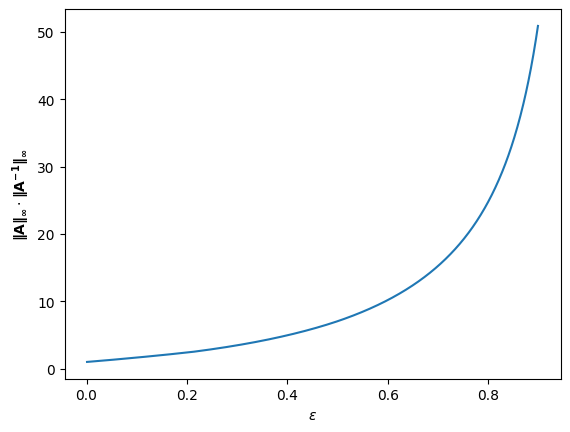

In [ ]:
cn_inf = []
es = np.arange(0.001, 0.9, 0.001)
for e in es:
    AA = system(1, e)
    cn_inf.append(norm(AA, np.inf) * norm(inv(AA), np.inf))
plt.close()
plt.plot(es, cn_inf)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\mathbf{\|A\|_{\infty}}\cdot\mathbf{\|A^{-1}\|_{\infty}}$")
plt.xscale("log")
plt.show()

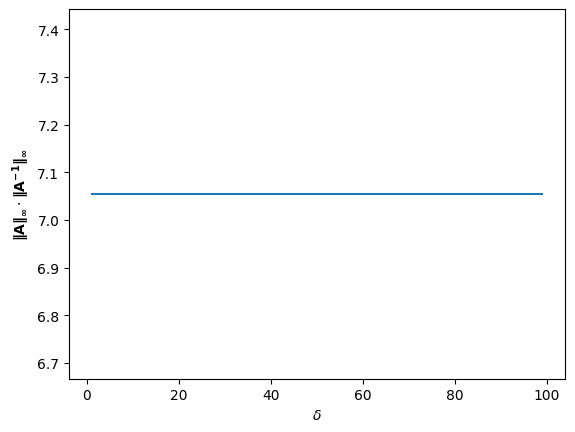

In [9]:
cn_inf = []
ds = np.arange(1, 100, 1)
for d in ds:
    AA = system(d, 0.5)
    cn_inf.append(norm(AA, np.inf) * norm(inv(AA), np.inf))
plt.close()
plt.plot(ds, cn_inf)
plt.xlabel(r"$\delta$")
plt.ylabel(r"$\mathbf{\|A\|_{\infty}}\cdot\mathbf{\|A^{-1}\|_{\infty}}$")
plt.show()

- The condition number is (proportional to) a ratio between singular values. Since $\delta$ is just an overall scaling factor, the singular values are rescaled with the same factor. This factor cancels when taking the ratio, and hence the condition number does not depend on $\delta$. 
- When $\epsilon$ approaches $1$, some entries in the matrix become very large, hence the system becomes more and more ill-conditioned. In the limit of $\epsilon=1$, some entries become infinity and the condition number blows up.
- When $\epsilon$ approaches $0$, only the diagonal entries become larger, which is again an overall scaling factor of the singular values. Hence the condition number does not blow up when $\epsilon$ approaches $0$.
- 